In [11]:
#!pip install matplotlib
#!pip install seaborn
# !pip install mamba

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


In [29]:
# Load REDD Dataset
redd = pd.read_csv('datasets/redd/redd_house1_2.csv')

print(f"REDD Shape: {redd.shape}")
print(f"REDD Columns: {list(redd.columns)}")
print("\nFirst 5 rows:")
print(redd.head())

REDD Shape: (28165, 8)
REDD Columns: ['Unnamed: 0', 'dish washer', 'electric space heater', 'electric stove', 'fridge', 'microwave', 'washer dryer', 'main']

First 5 rows:
   Unnamed: 0  dish washer  electric space heater  electric stove  fridge  \
0           0          0.0                    0.0             0.0    45.0   
1           1          0.0                    0.0             0.0     6.0   
2           2          0.0                    0.0             0.0     6.0   
3           3          0.0                    0.0             0.0     6.0   
4           4          0.0                    0.0             0.0     6.0   

   microwave  washer dryer        main  
0        4.0           0.0  283.209991  
1        4.0           0.0  250.699997  
2        4.0           0.0  250.699997  
3        4.0           0.0  250.699997  
4        4.0           0.0  249.779999  


In [30]:
#Load Occupancy Dataset
# Update this with the actual filename inside occupancy+detection folder
occupancy = pd.read_csv('datasets/occupancy+detection/datatraining.txt')  # or datatest.txt

print(f"Occupancy Shape: {occupancy.shape}")
print(f"Occupancy Columns: {list(occupancy.columns)}")
print("\nFirst 5 rows:")
print(occupancy.head())

Occupancy Shape: (8143, 7)
Occupancy Columns: ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy']

First 5 rows:
                  date  Temperature  Humidity  Light     CO2  HumidityRatio  \
1  2015-02-04 17:51:00        23.18   27.2720  426.0  721.25       0.004793   
2  2015-02-04 17:51:59        23.15   27.2675  429.5  714.00       0.004783   
3  2015-02-04 17:53:00        23.15   27.2450  426.0  713.50       0.004779   
4  2015-02-04 17:54:00        23.15   27.2000  426.0  708.25       0.004772   
5  2015-02-04 17:55:00        23.10   27.2000  426.0  704.50       0.004757   

   Occupancy  
1          1  
2          1  
3          1  
4          1  
5          1  


In [ ]:
#Drop date columns
if 'date' in occupancy.columns:
    occupancy = occupancy.drop('date', axis=1)
    print("\n✓ Dropped 'date' column from occupancy dataset")

print("\n" + "="*80)
print("✅ SECTION 1 COMPLETE: Datasets loaded!")
print(occupancy.head())

In [33]:
# Basic statistics for 'main' column
# ----------------------------------------------------------------------------
print("\nBasic Statistics:")
print(redd['main'].describe())


Basic Statistics:
count    28165.000000
mean       227.534258
std        185.698941
min         93.010002
25%        129.070007
50%        169.169998
75%        286.799988
max       2097.870117
Name: main, dtype: float64


In [35]:
# Calculate key values
# ----------------------------------------------------------------------------
max_main = redd['main'].max()
percentile_70 = redd['main'].quantile(0.70)
percentile_80 = redd['main'].quantile(0.80)
percentile_90 = redd['main'].quantile(0.90)
percentile_95 = redd['main'].quantile(0.95)
percentile_98 = redd['main'].quantile(0.98)
percentile_99 = redd['main'].quantile(0.99)
mean_main = redd['main'].mean()
median_main = redd['main'].median()

print(f"\n🔑 Key Values:")
print(f"   Max consumption: {max_main:.2f}W")
print(f"   70th percentile: {percentile_70:.2f}W")
print(f"   80th percentile: {percentile_80:.2f}W")
print(f"   90th percentile: {percentile_90:.2f}W")
print(f"   95th percentile: {percentile_95:.2f}W")
print(f"   98th percentile: {percentile_98:.2f}W")
print(f"   99th percentile: {percentile_99:.2f}W")
print(f"   Mean: {mean_main:.2f}W")
print(f"   Median: {median_main:.2f}W")


🔑 Key Values:
   Max consumption: 2097.87W
   70th percentile: 275.45W
   80th percentile: 307.18W
   90th percentile: 353.79W
   95th percentile: 410.80W
   98th percentile: 550.46W
   99th percentile: 1266.20W
   Mean: 227.53W
   Median: 169.17W


In [132]:
# Calculate renewable capacities (70% of peak)
# ----------------------------------------------------------------------------
total_renewable_capacity = max_main * 0.50
solar_max_capacity = total_renewable_capacity * 0.65
wind_max_capacity = total_renewable_capacity * 0.35

print(f"\n⚡ Renewable Capacities (70% of peak):")
print(f"   Total renewable capacity: {total_renewable_capacity:.2f}W")
print(f"   Solar max capacity: {solar_max_capacity:.2f}W ({solar_max_capacity/max_main*100:.1f}% of peak)")
print(f"   Wind max capacity: {wind_max_capacity:.2f}W ({wind_max_capacity/max_main*100:.1f}% of peak)")


⚡ Renewable Capacities (70% of peak):
   Total renewable capacity: 1499.60W
   Solar max capacity: 974.74W (32.5% of peak)
   Wind max capacity: 524.86W (17.5% of peak)


In [36]:
LOW_CONSUMPTION_MIN = 200   # W
LOW_CONSUMPTION_MAX = 500   # W
HIGH_CONSUMPTION_MIN = 500  # W
HIGH_CONSUMPTION_MAX = 3000 # W (3kW max)

In [37]:
occupancy_counts = occupancy['Occupancy'].value_counts()
print(f"\nOccupancy Distribution:")
print(f"   Occupied (1): {occupancy_counts.get(1, 0)} rows ({occupancy_counts.get(1, 0)/len(occupancy)*100:.1f}%)")
print(f"   Unoccupied (0): {occupancy_counts.get(0, 0)} rows ({occupancy_counts.get(0, 0)/len(occupancy)*100:.1f}%)")
print(f"   Total: {len(occupancy)} rows")


Occupancy Distribution:
   Occupied (1): 1729 rows (21.2%)
   Unoccupied (0): 6414 rows (78.8%)
   Total: 8143 rows


In [38]:
# Calculate max_light for solar generation
# ----------------------------------------------------------------------------
max_light = occupancy['Light'].max()
print(f"\n💡 Light sensor range:")
print(f"   Max Light: {max_light:.2f} lux")
print(f"   Min Light: {occupancy['Light'].min():.2f} lux")


💡 Light sensor range:
   Max Light: 1546.33 lux
   Min Light: 0.00 lux


In [39]:
# Split occupancy by status
# ----------------------------------------------------------------------------
occupied_rows = occupancy[occupancy['Occupancy'] == 1].copy()
unoccupied_rows = occupancy[occupancy['Occupancy'] == 0].copy()

print(f"\n✂️  Split complete:")
print(f"   Occupied rows: {len(occupied_rows)}")
print(f"   Unoccupied rows: {len(unoccupied_rows)}")



✂️  Split complete:
   Occupied rows: 1729
   Unoccupied rows: 6414


In [40]:
def generate_consumption(is_occupied):
    """Generate consumption value based on occupancy with weighted logic"""
    random_val = np.random.random()
    
    if is_occupied:  # Occupancy = 1
        if random_val < 0.70:  # 70% chance HIGH
            return np.random.uniform(HIGH_CONSUMPTION_MIN, HIGH_CONSUMPTION_MAX)
        else:  # 30% chance RANDOM
            return np.random.uniform(LOW_CONSUMPTION_MIN, HIGH_CONSUMPTION_MAX)
    else:  # Occupancy = 0
        if random_val < 0.60:  # 60% chance LOW
            return np.random.uniform(LOW_CONSUMPTION_MIN, LOW_CONSUMPTION_MAX)
        else:  # 40% chance RANDOM
            return np.random.uniform(LOW_CONSUMPTION_MIN, HIGH_CONSUMPTION_MAX)

In [41]:
# Generate for occupied rows
print("Generating consumption for occupied rows...")
occupied_rows['main'] = [generate_consumption(True) for _ in range(len(occupied_rows))]

# Generate for unoccupied rows
print("Generating consumption for unoccupied rows...")
unoccupied_rows['main'] = [generate_consumption(False) for _ in range(len(unoccupied_rows))]

Generating consumption for occupied rows...
Generating consumption for unoccupied rows...


In [100]:
merged_data = pd.concat([occupied_rows, unoccupied_rows], ignore_index=True)

# Shuffle to mix occupied and unoccupied rows
merged_data = merged_data.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n✓ Merged dataset created!")
print(f"   Total rows: {len(merged_data)}")
print(f"   Columns: {list(merged_data.columns)}")


✓ Merged dataset created!
   Total rows: 8143
   Columns: ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy', 'main']


In [43]:
# Analyze generated consumption distribution
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("\n📈 CONSUMPTION DISTRIBUTION ANALYSIS")
print("="*80)

print("\nGenerated 'main' statistics:")
print(merged_data['main'].describe())

max_main = merged_data['main'].max()
min_main = merged_data['main'].min()
mean_main = merged_data['main'].mean()

print(f"\n🔑 Key Values:")
print(f"   Max: {max_main:.2f}W")
print(f"   Min: {min_main:.2f}W")
print(f"   Mean: {mean_main:.2f}W")

# Check distribution by occupancy
occupied_main = merged_data[merged_data['Occupancy'] == 1]['main']
unoccupied_main = merged_data[merged_data['Occupancy'] == 0]['main']

print(f"\n📊 By Occupancy:")
print(f"   Occupied mean: {occupied_main.mean():.2f}W")
print(f"   Unoccupied mean: {unoccupied_main.mean():.2f}W")
print(f"   Ratio: {occupied_main.mean()/unoccupied_main.mean():.2f}x")



📈 CONSUMPTION DISTRIBUTION ANALYSIS

Generated 'main' statistics:
count    8143.000000
mean     1013.138542
std       855.446358
min       200.009216
25%       341.223642
50%       489.043984
75%      1680.410987
max      2999.209485
Name: main, dtype: float64

🔑 Key Values:
   Max: 2999.21W
   Min: 200.01W
   Mean: 1013.14W

📊 By Occupancy:
   Occupied mean: 1715.28W
   Unoccupied mean: 823.87W
   Ratio: 2.08x


In [142]:
# Calculate renewable capacities (70% of peak)
# ----------------------------------------------------------------------------
total_renewable_capacity = max_main * 0.50
solar_max_capacity = total_renewable_capacity * 0.65
wind_max_capacity = total_renewable_capacity * 0.35

print(f"\n⚡ Renewable Capacities (70% of peak load):")
print(f"   Solar max: {solar_max_capacity:.2f}W")
print(f"   Wind max: {wind_max_capacity:.2f}W")
print(f"   Total renewable: {total_renewable_capacity:.2f}W")



⚡ Renewable Capacities (70% of peak load):
   Solar max: 974.74W
   Wind max: 524.86W
   Total renewable: 1499.60W


C:\Users\svchi\AppData\Local\Temp\ipykernel_2448\1143828752.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[2].boxplot([occupied_main, unoccupied_main], labels=['Occupied', 'Unoccupied'])


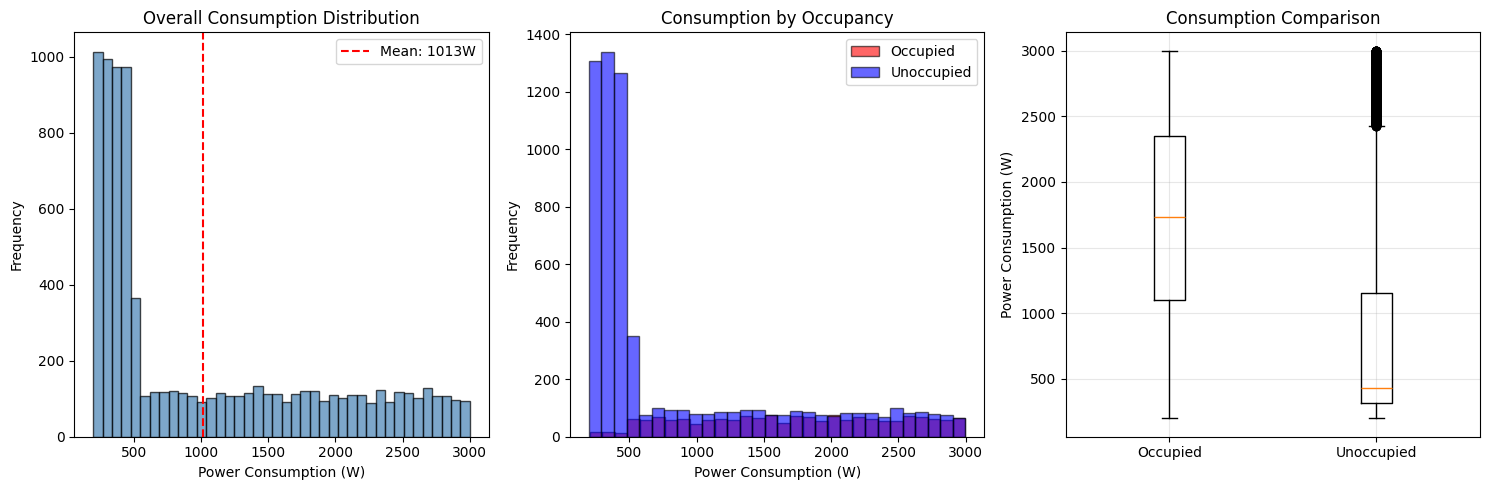

In [158]:
# Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Overall distribution
axes[0].hist(merged_data['main'], bins=40, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_xlabel('Power Consumption (W)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Overall Consumption Distribution')
axes[0].axvline(mean_main, color='red', linestyle='--', label=f'Mean: {mean_main:.0f}W')
axes[0].legend()

# By occupancy
axes[1].hist(occupied_main, bins=30, alpha=0.6, label='Occupied', color='red', edgecolor='black')
axes[1].hist(unoccupied_main, bins=30, alpha=0.6, label='Unoccupied', color='blue', edgecolor='black')
axes[1].set_xlabel('Power Consumption (W)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Consumption by Occupancy')
axes[1].legend()

# Boxplot comparison
axes[2].boxplot([occupied_main, unoccupied_main], labels=['Occupied', 'Unoccupied'])
axes[2].set_ylabel('Power Consumption (W)')
axes[2].set_title('Consumption Comparison')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [73]:
# # Solar generation formula
# # ----------------------------------------------------------------------------
# def generate_solar_output(light, humidity, temperature):
#     """Generate solar output based on environmental conditions"""
#     # Normalize light (0-1)
#     light_factor = light / max_light
    
#     # Weather penalty (high humidity = clouds/rain)
#     weather_penalty = 1 - (humidity / 150)
#     weather_penalty = max(0, weather_penalty)
    
#     # Temperature factor (hot panels less efficient)
#     temp_factor = 1.0 if temperature < 25 else 0.93
    
#     # Combined efficiency with randomness
#     solar_efficiency = light_factor * weather_penalty * temp_factor * np.random.uniform(0.85, 1.0)
    
#     # Final output
#     solar_output = solar_max_capacity * solar_efficiency
#     return max(0, solar_output)

# # ----------------------------------------------------------------------------
# # Wind generation formula
# # ----------------------------------------------------------------------------
# def generate_wind_output(humidity, temperature):
#     """Generate wind output based on environmental conditions (no temporal data)"""
#     # Humidity deviation from baseline
#     humidity_deviation = abs(humidity - 27)
#     humidity_factor = min(humidity_deviation / 3, 1.0)
    
#     # Temperature factor (cooler = windier)
#     temp_factor = (25 - temperature) / 10
#     temp_factor = max(0, min(temp_factor, 1.0))
    
#     # Combined base factor
#     wind_base_factor = (humidity_factor * 0.4) + (temp_factor * 0.6)
    
#     # Add randomness
#     wind_efficiency = wind_base_factor * np.random.uniform(0.6, 1.0)
    
#     # Final output
#     wind_output = wind_max_capacity * wind_efficiency
#     return max(0, wind_output)

In [144]:
#Alternate solar generation

def generate_solar_output():
    base = np.random.beta(2.8, 2.0)
    variability = np.random.uniform(0.7, 1.05)
    return min(solar_max_capacity, solar_max_capacity * base * variability)


def generate_wind_output():
    base = np.random.beta(2.0, 3.0)
    variability = np.random.uniform(0.75, 1.1)
    return min(wind_max_capacity, wind_max_capacity * base * variability)


In [145]:
sample = merged_data.copy()

sample['solar_output'] = sample.apply(lambda _: generate_solar_output(), axis=1)
sample['wind_output'] = sample.apply(lambda _: generate_wind_output(), axis=1)

sample['total_renewable'] = (
    sample['solar_output'] + sample['wind_output']
)

sample['renewable_ratio'] = (
    sample['total_renewable'] / sample['main']
)


In [146]:
feasible_mask = sample['main'] <= total_renewable_capacity

In [128]:
##Not using now

# target_success = 0.60

# current_success = (
#     (sample.loc[feasible_mask, 'renewable_ratio'] >= 1.0).mean()
# )

# scaling_factor = current_success / target_success

# sample.loc[feasible_mask, 'solar_output'] /= scaling_factor
# sample.loc[feasible_mask, 'wind_output'] /= scaling_factor

# sample['total_renewable'] = (
#     sample['solar_output'] + sample['wind_output']
# )

# sample['renewable_ratio'] = (
#     sample['total_renewable'] / sample['main']
# )


In [147]:
print("\n" + "=" * 80)
print("🔍 RENEWABLE GENERATION SANITY CHECKS")
print("=" * 80)

# Capacity checks
print("\nInstalled capacities:")
print(f"  Max main demand           : {max_main:.2f}")
print(f"  Total renewable capacity  : {total_renewable_capacity:.2f}")
print(f"  Solar max capacity        : {solar_max_capacity:.2f}")
print(f"  Wind max capacity         : {wind_max_capacity:.2f}")

print("\nCapacity violation checks:")
print(f"  Solar > solar_max_capacity : {(sample['solar_output'] > solar_max_capacity).sum()}")
print(f"  Wind  > wind_max_capacity  : {(sample['wind_output'] > wind_max_capacity).sum()}")
print(f"  Total > renewable_capacity : {(sample['total_renewable'] > total_renewable_capacity).sum()}")

# Feasibility region
feasible_mask = sample['main'] <= total_renewable_capacity
total_rows = len(sample)
feasible_rows = feasible_mask.sum()

print("\nFeasibility analysis:")
print(f"  Total rows                : {total_rows}")
print(f"  Feasible rows (main <= cap): {feasible_rows} ({feasible_rows / total_rows * 100:.2f}%)")

# Success rate in feasible region
success_feasible = (
    (sample.loc[feasible_mask, 'renewable_ratio'] >= 1.0).mean()
)

print("\nRenewable sufficiency:")
print(f"  Success rate in feasible region : {success_feasible * 100:.2f}%")
print("  Target success rate             : 60.00%")

# Global success rate (should be lower by design)
global_success = (sample['renewable_ratio'] >= 1.0).mean()

print("\nOverall system behavior:")
print(f"  Overall renewable success rate  : {global_success * 100:.2f}%")
print("  (Expected < feasible success due to peak demand)")

# Distribution quick stats
print("\nRenewable ratio summary:")
print(sample['renewable_ratio'].describe())

print("\nSample rows (high demand):")
print(
    sample[sample['main'] > total_renewable_capacity]
    [['main', 'total_renewable', 'renewable_ratio']]
    .head(5)
)

print("\nSample rows (feasible & successful):")
print(
    sample[(feasible_mask) & (sample['renewable_ratio'] >= 1.0)]
    [['main', 'total_renewable', 'renewable_ratio']]
    .head(5)
)

print("\nSample rows (feasible but failed):")
print(
    sample[(feasible_mask) & (sample['renewable_ratio'] < 1.0)]
    [['main', 'total_renewable', 'renewable_ratio']]
    .head(5)
)

print("\n" + "=" * 80)
print("✅ SANITY CHECK COMPLETE")
print("=" * 80)



🔍 RENEWABLE GENERATION SANITY CHECKS

Installed capacities:
  Max main demand           : 2999.21
  Total renewable capacity  : 1499.60
  Solar max capacity        : 974.74
  Wind max capacity         : 524.86

Capacity violation checks:
  Solar > solar_max_capacity : 0
  Wind  > wind_max_capacity  : 0
  Total > renewable_capacity : 0

Feasibility analysis:
  Total rows                : 8143
  Feasible rows (main <= cap): 5840 (71.72%)

Renewable sufficiency:
  Success rate in feasible region : 73.20%
  Target success rate             : 60.00%

Overall system behavior:
  Overall renewable success rate  : 52.50%
  (Expected < feasible success due to peak demand)

Renewable ratio summary:
count    8143.000000
mean        1.343525
std         1.051195
min         0.059420
25%         0.405722
50%         1.123397
75%         2.021429
max         6.222145
Name: renewable_ratio, dtype: float64

Sample rows (high demand):
           main  total_renewable  renewable_ratio
0   1899.680232    

In [122]:
sample[sample['solar_output'] > solar_max_capacity]

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,main,solar_output,wind_output,total_renewable,renewable_ratio


In [62]:
# # Apply formulas to sample data
# # ----------------------------------------------------------------------------
# print("\n🔧 Applying formulas to sample data (first 100 rows)...")

# sample = merged_data.copy()

# sample['solar_output'] = sample.apply(
#     lambda row: generate_solar_output(row['Light'], row['Humidity'], row['Temperature']), 
#     axis=1
# )

# sample['wind_output'] = sample.apply(
#     lambda row: generate_wind_output(row['Humidity'], row['Temperature']), 
#     axis=1
# )

# sample['total_renewable'] = sample['solar_output'] + sample['wind_output']
# sample['renewable_ratio'] = sample['total_renewable'] / sample['main']


🔧 Applying formulas to sample data (first 100 rows)...


In [63]:
# # Analyze scenarios
# # ----------------------------------------------------------------------------
# print("\n" + "="*80)
# print("\n📊 SCENARIO ANALYSIS")
# print("="*80)

# # Categorize scenarios
# sample['scenario'] = 'UNDEFINED'

# # Scenario 1: Renewable covers load (ratio >= 1.0)
# sample.loc[sample['renewable_ratio'] >= 1.0, 'scenario'] = 'RENEWABLE_SUFFICIENT'

# # Scenario 2: Renewable insufficient but moderate (0.3 <= ratio < 1.0)
# sample.loc[(sample['renewable_ratio'] >= 0.3) & (sample['renewable_ratio'] < 1.0), 'scenario'] = 'PARTIAL_RENEWABLE'

# # Scenario 3: Very low renewable (ratio < 0.3)
# sample.loc[sample['renewable_ratio'] < 0.3, 'scenario'] = 'RENEWABLE_INSUFFICIENT'

# scenario_counts = sample['scenario'].value_counts()

# print("\nScenario Distribution (sample of 100 rows):")
# for scenario, count in scenario_counts.items():
#     print(f"   {scenario}: {count} rows ({count/len(sample)*100:.1f}%)")



📊 SCENARIO ANALYSIS

Scenario Distribution (sample of 100 rows):
   RENEWABLE_SUFFICIENT: 5038 rows (61.9%)
   PARTIAL_RENEWABLE: 2734 rows (33.6%)
   RENEWABLE_INSUFFICIENT: 371 rows (4.6%)


In [54]:
# # Detailed statistics
# # ----------------------------------------------------------------------------
# print("\n" + "="*80)
# print("\n📈 RENEWABLE GENERATION STATISTICS")
# print("="*80)

# print("\nSolar Output:")
# print(sample['solar_output'].describe())

# print("\nWind Output:")
# print(sample['wind_output'].describe())

# print("\nTotal Renewable:")
# print(sample['total_renewable'].describe())

# print("\nRenewable Ratio (renewable/consumption):")
# print(sample['renewable_ratio'].describe())



📈 RENEWABLE GENERATION STATISTICS

Solar Output:
count    8143.000000
mean       80.751190
std       131.784122
min         0.000000
25%         0.000000
50%         0.000000
75%       176.063947
max      1088.427913
Name: solar_output, dtype: float64

Wind Output:
count    8143.000000
mean      332.903958
std       102.814073
min        65.076532
25%       262.833013
50%       342.351900
75%       410.760328
max       553.449928
Name: wind_output, dtype: float64

Total Renewable:
count    8143.000000
mean      413.655148
std       150.469593
min        85.712284
25%       310.042049
50%       402.025087
75%       493.916949
max      1476.614827
Name: total_renewable, dtype: float64

Renewable Ratio (renewable/consumption):
count    8143.000000
mean        0.741907
std         0.538545
min         0.034204
25%         0.274788
50%         0.635797
75%         1.071616
max         4.373291
Name: renewable_ratio, dtype: float64


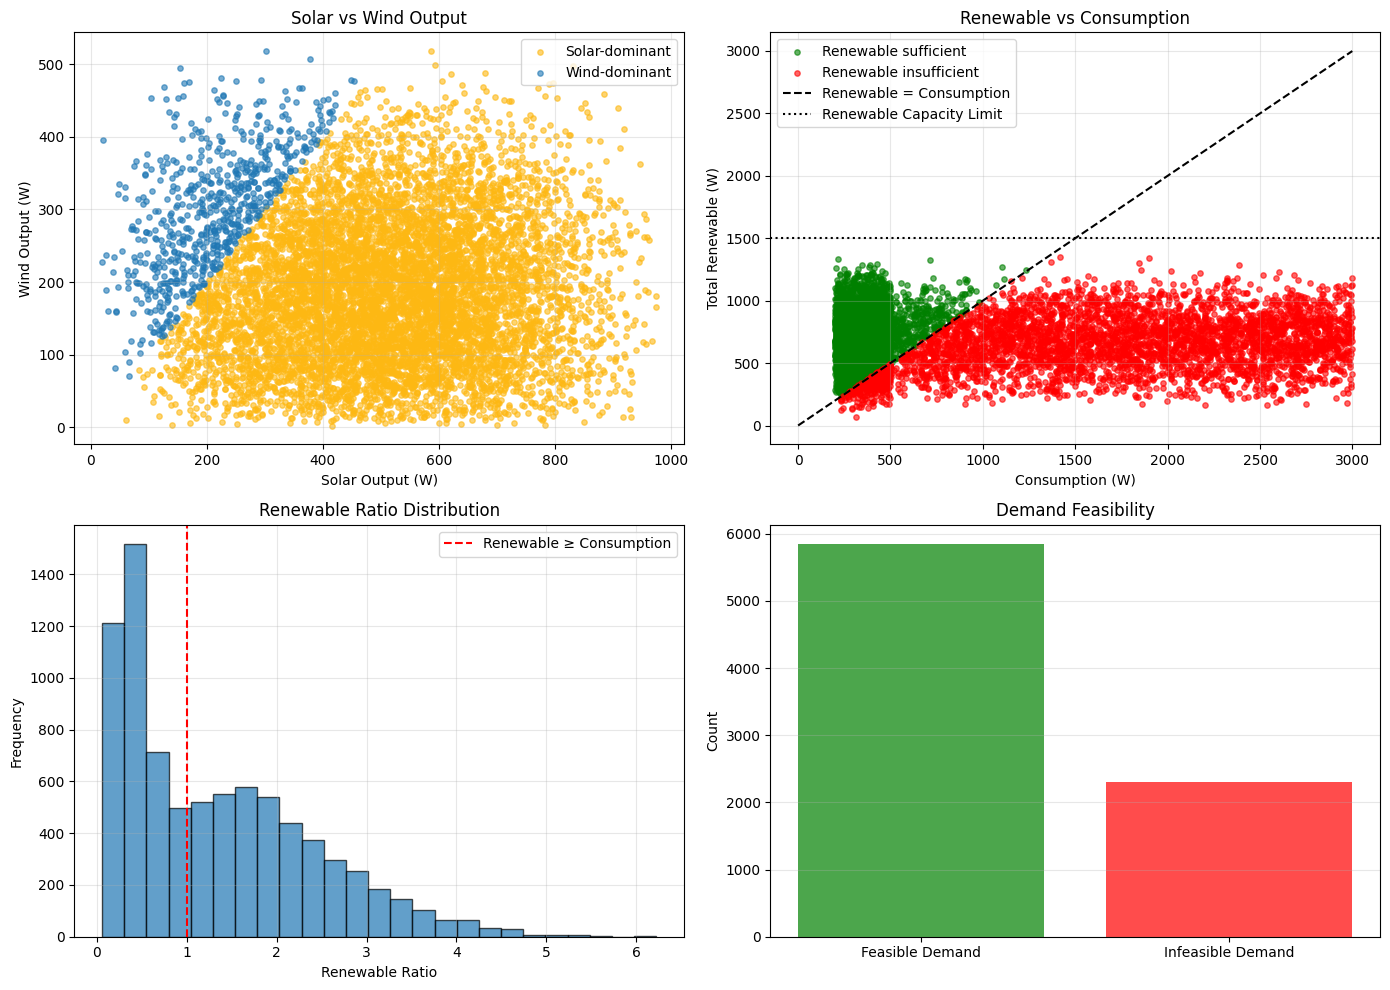

In [148]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# -------------------- Plot 1: Solar vs Wind (dominance color) --------------------
dominance = sample['solar_output'] > sample['wind_output']

axes[0, 0].scatter(
    sample.loc[dominance, 'solar_output'],
    sample.loc[dominance, 'wind_output'],
    color='#FDB813',
    alpha=0.6,
    s=15,
    label='Solar-dominant'
)

axes[0, 0].scatter(
    sample.loc[~dominance, 'solar_output'],
    sample.loc[~dominance, 'wind_output'],
    color='#1f77b4',
    alpha=0.6,
    s=15,
    label='Wind-dominant'
)

axes[0, 0].set_xlabel('Solar Output (W)')
axes[0, 0].set_ylabel('Wind Output (W)')
axes[0, 0].set_title('Solar vs Wind Output')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# -------------------- Plot 2: Renewable vs Consumption --------------------
sufficient = sample['renewable_ratio'] >= 1.0

axes[0, 1].scatter(
    sample.loc[sufficient, 'main'],
    sample.loc[sufficient, 'total_renewable'],
    color='green',
    alpha=0.6,
    s=15,
    label='Renewable sufficient'
)

axes[0, 1].scatter(
    sample.loc[~sufficient, 'main'],
    sample.loc[~sufficient, 'total_renewable'],
    color='red',
    alpha=0.6,
    s=15,
    label='Renewable insufficient'
)

axes[0, 1].plot(
    [0, max_main],
    [0, max_main],
    'k--',
    label='Renewable = Consumption'
)

axes[0, 1].axhline(
    total_renewable_capacity,
    color='black',
    linestyle=':',
    label='Renewable Capacity Limit'
)

axes[0, 1].set_xlabel('Consumption (W)')
axes[0, 1].set_ylabel('Total Renewable (W)')
axes[0, 1].set_title('Renewable vs Consumption')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# -------------------- Plot 3: Renewable Ratio Distribution --------------------
axes[1, 0].hist(
    sample['renewable_ratio'],
    bins=25,
    edgecolor='black',
    alpha=0.7
)

axes[1, 0].axvline(
    1.0,
    color='red',
    linestyle='--',
    label='Renewable ≥ Consumption'
)

axes[1, 0].set_xlabel('Renewable Ratio')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Renewable Ratio Distribution')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# -------------------- Plot 4: Feasible vs Infeasible --------------------
feasible = sample['main'] <= total_renewable_capacity

axes[1, 1].bar(
    ['Feasible Demand', 'Infeasible Demand'],
    [feasible.sum(), (~feasible).sum()],
    color=['green', 'red'],
    alpha=0.7
)

axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Demand Feasibility')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [153]:

def assign_label(renewable_ratio):
    if renewable_ratio >= 1.05:
        return 'ECO_SOURCE'
    elif renewable_ratio <= 0.90:
        return 'MAINS'
    else:
        prob_eco = (renewable_ratio - 0.90) / (1.05 - 0.90)
        return 'ECO_SOURCE' if np.random.rand() < prob_eco else 'MAINS'


sample['energy_source'] = sample['renewable_ratio'].apply(assign_label)

In [155]:
print("\nLabel distribution:")
print(sample.shape[0])
print(sample['energy_source'].value_counts())

print("\nMean renewable_ratio by label:")
print(sample.groupby('energy_source')['renewable_ratio'].mean())

print("\nBoundary samples:")
print(
    sample[
        (sample['renewable_ratio'] > 0.90) &
        (sample['renewable_ratio'] < 1.05)
    ][['renewable_ratio', 'energy_source']].head(10)
)



Label distribution:
8143
energy_source
ECO_SOURCE    4331
MAINS         3812
Name: count, dtype: int64

Mean renewable_ratio by label:
energy_source
ECO_SOURCE    2.134825
MAINS         0.444491
Name: renewable_ratio, dtype: float64

Boundary samples:
     renewable_ratio energy_source
32          1.005529    ECO_SOURCE
53          0.927036         MAINS
54          0.906718         MAINS
96          0.931590         MAINS
127         0.999394    ECO_SOURCE
137         0.948087         MAINS
171         1.043205    ECO_SOURCE
198         0.905662         MAINS
202         0.910410         MAINS
207         0.978391    ECO_SOURCE


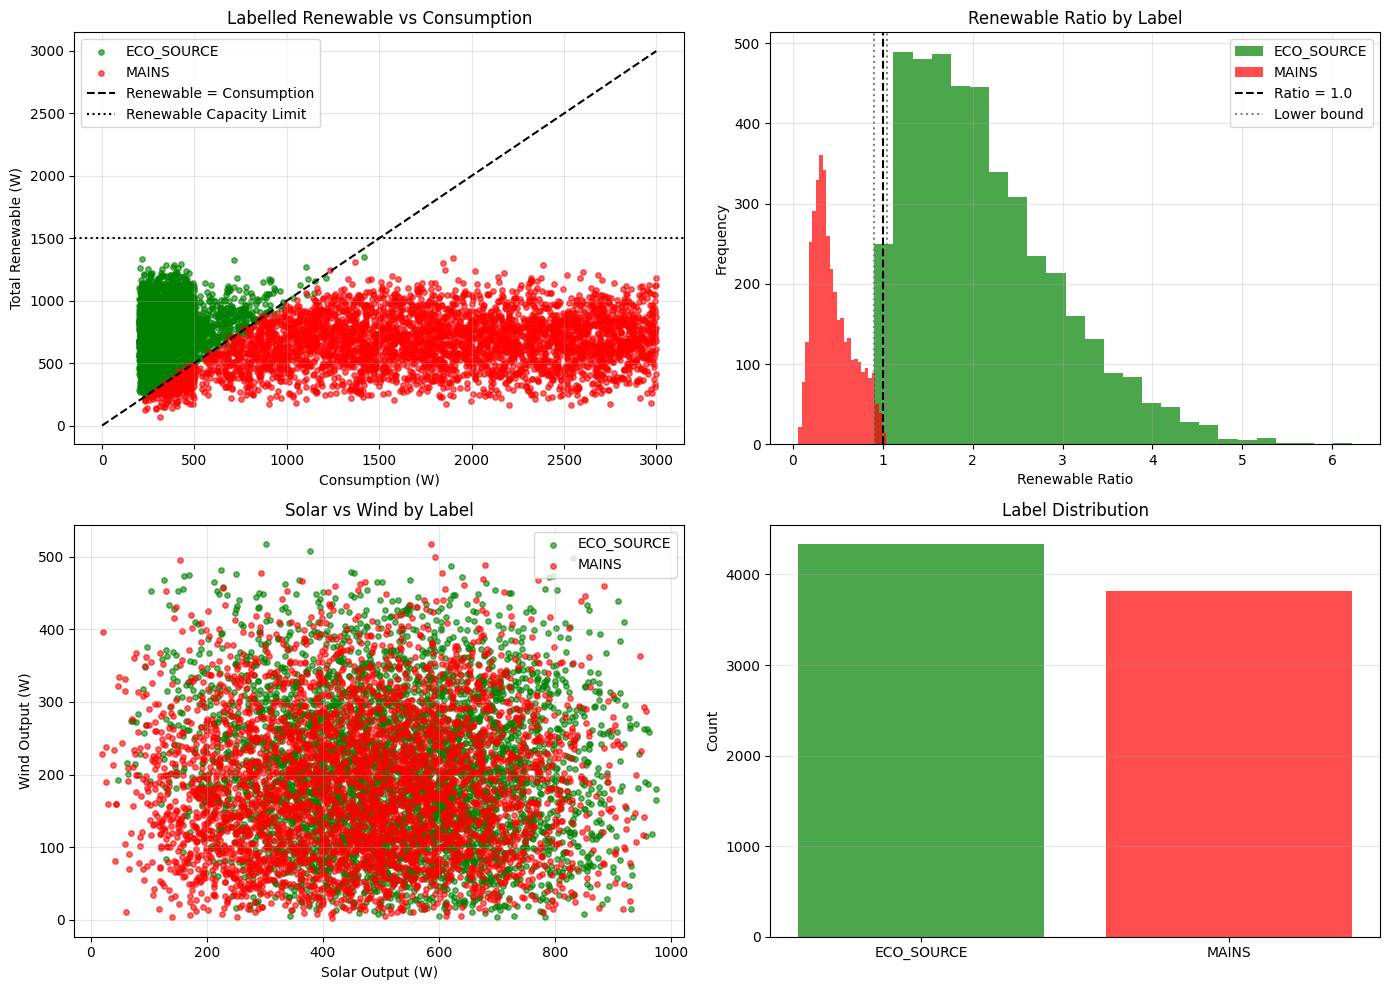

In [156]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# -------------------------------------------------
# 1. Renewable vs Consumption (colored by label)
# -------------------------------------------------
eco = sample['energy_source'] == 'ECO_SOURCE'
mains = sample['energy_source'] == 'MAINS'

axes[0, 0].scatter(
    sample.loc[eco, 'main'],
    sample.loc[eco, 'total_renewable'],
    color='green',
    alpha=0.6,
    s=15,
    label='ECO_SOURCE'
)

axes[0, 0].scatter(
    sample.loc[mains, 'main'],
    sample.loc[mains, 'total_renewable'],
    color='red',
    alpha=0.6,
    s=15,
    label='MAINS'
)

axes[0, 0].plot(
    [0, max_main],
    [0, max_main],
    'k--',
    label='Renewable = Consumption'
)

axes[0, 0].axhline(
    total_renewable_capacity,
    color='black',
    linestyle=':',
    label='Renewable Capacity Limit'
)

axes[0, 0].set_xlabel('Consumption (W)')
axes[0, 0].set_ylabel('Total Renewable (W)')
axes[0, 0].set_title('Labelled Renewable vs Consumption')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# -------------------------------------------------
# 2. Renewable ratio distribution by label
# -------------------------------------------------
axes[0, 1].hist(
    sample.loc[eco, 'renewable_ratio'],
    bins=25,
    alpha=0.7,
    color='green',
    label='ECO_SOURCE'
)

axes[0, 1].hist(
    sample.loc[mains, 'renewable_ratio'],
    bins=25,
    alpha=0.7,
    color='red',
    label='MAINS'
)

axes[0, 1].axvline(1.0, color='black', linestyle='--', label='Ratio = 1.0')
axes[0, 1].axvline(0.90, color='gray', linestyle=':', label='Lower bound')
axes[0, 1].axvline(1.05, color='gray', linestyle=':')

axes[0, 1].set_xlabel('Renewable Ratio')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Renewable Ratio by Label')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# -------------------------------------------------
# 3. Solar vs Wind colored by label
# -------------------------------------------------
axes[1, 0].scatter(
    sample.loc[eco, 'solar_output'],
    sample.loc[eco, 'wind_output'],
    color='green',
    alpha=0.6,
    s=15,
    label='ECO_SOURCE'
)

axes[1, 0].scatter(
    sample.loc[mains, 'solar_output'],
    sample.loc[mains, 'wind_output'],
    color='red',
    alpha=0.6,
    s=15,
    label='MAINS'
)

axes[1, 0].set_xlabel('Solar Output (W)')
axes[1, 0].set_ylabel('Wind Output (W)')
axes[1, 0].set_title('Solar vs Wind by Label')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# -------------------------------------------------
# 4. Label counts
# -------------------------------------------------
label_counts = sample['energy_source'].value_counts()

axes[1, 1].bar(
    label_counts.index,
    label_counts.values,
    color=['green', 'red'],
    alpha=0.7
)

axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Label Distribution')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [157]:
output_path = "datasets/synthetic_energy_dataset.csv"

sample.to_csv(output_path, index=False)

print(f"Dataset saved successfully at: {output_path}")
print(f"Rows: {len(sample)}")
print(f"Columns: {list(sample.columns)}")

Dataset saved successfully at: datasets/synthetic_energy_dataset.csv
Rows: 8143
Columns: ['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Occupancy', 'main', 'solar_output', 'wind_output', 'total_renewable', 'renewable_ratio', 'energy_source']
